#### SUMMARY OF THE CASE STUDY 

Work from home (WFH) has become a new normal for workers around the world. Several companies are allowing at least 40% of their employees to work from home permanently.

Sao Paulo and Rio De Janeiro are among the most expensive cities to live in Brazil. Many people are considering relocating to a different city to live and work remotely.

Castro Brazila Inc., a top real estate management firm with a nationwide presence in Brazil, wishes to help people choose an alternate city to relocate to.

The main aim of this case study is to help firm figure out suitable cities for relocation for bachelors, for mid-sized families, and for large families.

##### Importing the required packages

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np     

#### Level 0 Analysis

##### Importing the dataset

In [2]:
df = pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


##### Preview of columns

In [3]:
print(df.columns)

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


##### Previewing the data

In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [6]:
# Finding the number of rows and number of columns in data 
df.shape

(10692, 13)

In [7]:
# Finding the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()   

### No null values are present

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [9]:
# Checking if there are any duplicate values and removing them.
duplicates = df[df.duplicated(keep=False)]

if not duplicates.empty:
    df.drop_duplicates(inplace = True)
    print("Removed all the duplicate values from the data")
else:
    print("No duplicate rows found")

Removed all the duplicate values from the data


In [10]:
### Segregating the values in categorical and continous columns
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 40:      
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")

In [12]:
info_of_cat("city")

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


In [13]:
info_of_cat("rooms")

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


In [14]:
info_of_cat("bathroom")

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


In [15]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


In [16]:
info_of_cat("floor")

Unique values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
Mode of floor is 0
Number of missing values in floor is 0


In [17]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


In [18]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


#### Numerical Analysis and removing outliers

In [19]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [20]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1091.2439520030966
The median of the hoa (R$) is 571.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 11446.092262576984
Number of missing values in the hoa (R$) is 0


In [21]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3966.2960131604414
The median of the rent amount (R$) is 2750.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3436.190007478068
Number of missing values in the rent amount (R$) is 0


In [22]:
info_of_numerical("property tax (R$)")

The mean of the property tax (R$) is 376.92926262821754
The median of the property tax (R$) is 130.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3160.602165032796
Number of missing values in the property tax (R$) is 0


In [23]:
info_of_numerical("fire insurance (R$)")

The mean of the fire insurance (R$) is 54.26427327269209
The median of the fire insurance (R$) is 37.0
The mode of the fire insurance (R$) is 20
The standard deviation of the fire insurance (R$) is 48.164380365782655
Number of missing values in the fire insurance (R$) is 0


In [24]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 5488.9434875169345
The median of the total (R$) is 3685.5
The mode of the total (R$) is 1219
The standard deviation of the total (R$) is 12669.110756359949
Number of missing values in the total (R$) is 0


#### For Bachelors   
#### Level 0 Analysis

In [25]:
B_city = df[(df.city =='Porto Alegre') | (df.city =='Campinas') | (df.city =='Belo Horizonte')]

In [26]:
# Filter the data for bachelor properties
bachelor_df = B_city[(B_city['rooms'] <= 1) & (B_city['bathroom'] <= 1) & (B_city['parking spaces'] <= 1)]

In [27]:
bachelor_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
39,Porto Alegre,40,1,1,1,6,acept,furnished,390,2990,0,44,3424
43,Belo Horizonte,45,1,1,1,5,acept,not furnished,500,1631,192,12,2335


In [28]:
bachelor_df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10609,Campinas,53,1,1,1,8,not acept,not furnished,550,650,36,9,1245
10627,Belo Horizonte,22,1,1,0,0,acept,not furnished,30,450,13,6,499
10632,Porto Alegre,18,1,1,0,3,not acept,furnished,370,1090,0,16,1476
10642,Porto Alegre,40,1,1,0,2,acept,not furnished,230,700,9,11,950
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707


#### Level 1 Analysis
##### Visual Representation


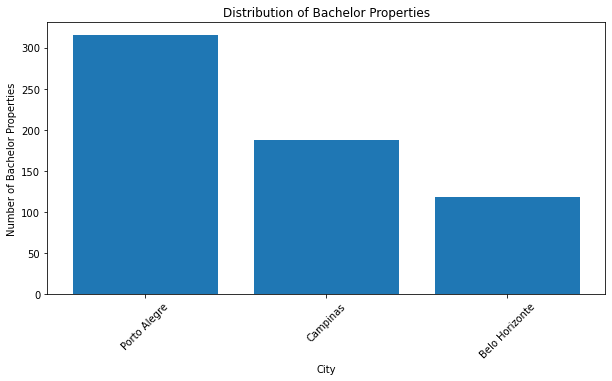

In [29]:
# Plotting a bar chart to visualize the distribution of bachelor properties
city_counts = bachelor_df['city'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Bachelor Properties')
plt.title('Distribution of Bachelor Properties')
plt.xticks(rotation=45)
plt.show()

##### Interpretation: Porto Alegre is the city with the most number of properties following it are Campinas and Belo Horizonte. So, if someone wants to move from Sao Paulo or Rio De Janerio, Porto Alegre is the best option for them.

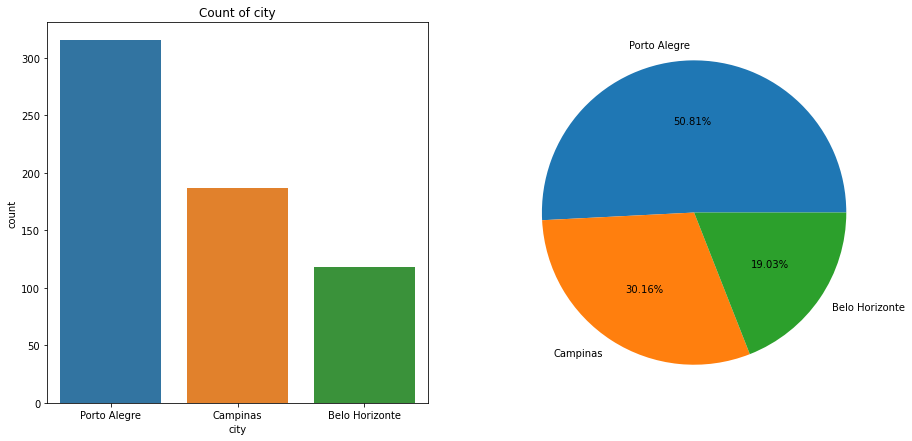

In [30]:
fix, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].set_title("Count of city")
percentage = bachelor_df["city"].value_counts()
labels = list(bachelor_df["city"].value_counts().index)

sns.countplot(x = bachelor_df["city"], ax=ax[0])
plt.pie(percentage,labels = labels, autopct = "%0.2f%%")

plt.show()

##### Interpretation: Porto Alegre covers atleast 50.81% of the residential areas.

#### Level 2 Analysis: Bivariate Analysis
* Based on the preference of bachelors, we will analyse the data further.
* The next factor on which we can analyse is The cost of the property

#### Q.) What is the cost distribution for the bachelors for one room, one bathroom and one parking space?

Average cost is 1708.1548387096775
Minimum cost is 499
Maximum cost is 32750


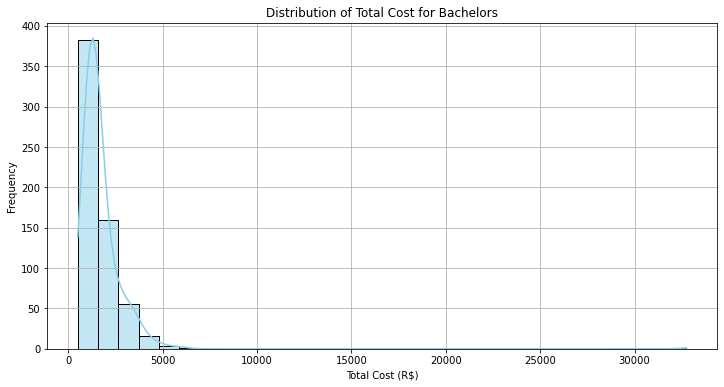

In [31]:
mean = bachelor_df['total (R$)'].mean()
print("Average cost is", mean)

minimum = bachelor_df['total (R$)'].min()
print("Minimum cost is", minimum)

maximum = bachelor_df['total (R$)'].max()
print("Maximum cost is", maximum)

plt.figure(figsize=(12, 6))
sns.histplot(data=bachelor_df, x='total (R$)',kde =True, bins=30, color='skyblue')
plt.title('Distribution of Total Cost for Bachelors')
plt.xlabel('Total Cost (R$)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

##### Interpretation: Each bar in the histogram represents a range of total costs, and the height of each bar represents the frequency. The minimum cost one has to pay is 499 dollars and the maximum cost is 32750 dollars.

#### Q.) What are average cost a bachelor need to pay in different cities.

Average cost for bachelor in different cities:
                 rent amount (R$)    hoa (R$)  property tax (R$)  \
city                                                              
Belo Horizonte       1359.926471  269.220588          62.750000   
Campinas             1123.528796  480.633508          41.560209   
Porto Alegre         1289.423188  421.255072          45.113043   

                fire insurance (R$)  
city                                 
Belo Horizonte            18.727941  
Campinas                  14.769634  
Porto Alegre              19.414493  


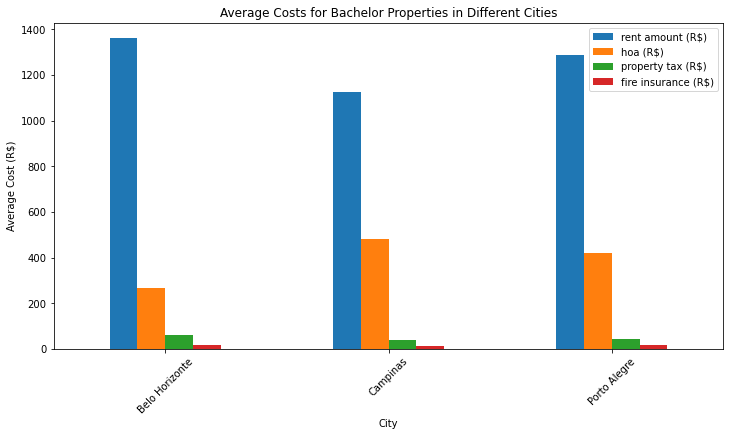

In [12]:
average_costs_for_bachelor = bachelor_df.groupby(['city'])[['rent amount (R$)', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']].mean()
print("Average cost for bachelor in different cities:\n",average_costs_for_bachelor)

# Plotting a bar chart to visualize the average costs for bachelor properties in different cities
average_costs_for_bachelor.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Average Cost (R$)')
plt.title('Average Costs for Bachelor Properties in Different Cities')
plt.xticks(rotation=45)
plt.show()

##### Interpretation: The rental costs are minimum in Campinas.

### For Mid sized families

#### Level 0 Analysis

In [60]:
mid_size_df = B_city[(B_city['rooms'] == 3) | (B_city['rooms'] == 2) & (B_city['bathroom'] <= 2) & (B_city['parking spaces'] <= 2)]

In [61]:
mid_size_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
27,Belo Horizonte,64,2,2,1,11,acept,not furnished,352,1500,80,20,1952
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
37,Belo Horizonte,80,3,2,1,0,acept,not furnished,0,11000,425,181,11610
46,Belo Horizonte,100,3,1,0,13,not acept,not furnished,700,1220,10,17,1947


In [62]:
mid_size_df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10665,Belo Horizonte,55,2,1,1,2,not acept,furnished,200,1600,75,22,1897
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926


#### Level 1 Analysis

##### Visual Representation

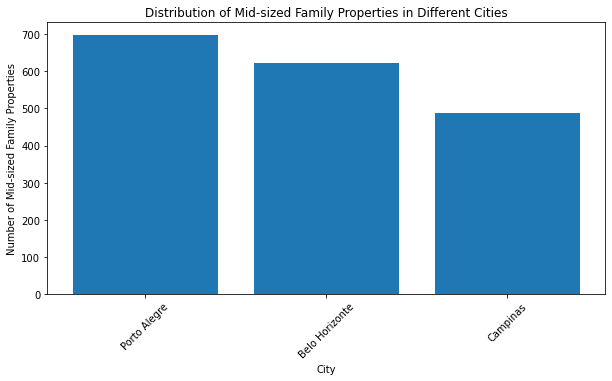

In [63]:
# Plot a bar chart to visualize the distribution of mid-sized family properties 
city_counts = mid_size_df['city'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Mid-sized Family Properties')
plt.title('Distribution of Mid-sized Family Properties in Different Cities')
plt.xticks(rotation=45)
plt.show()

##### Interpretation: For mid sized families, Porto Alegre is the city with most number of properties.

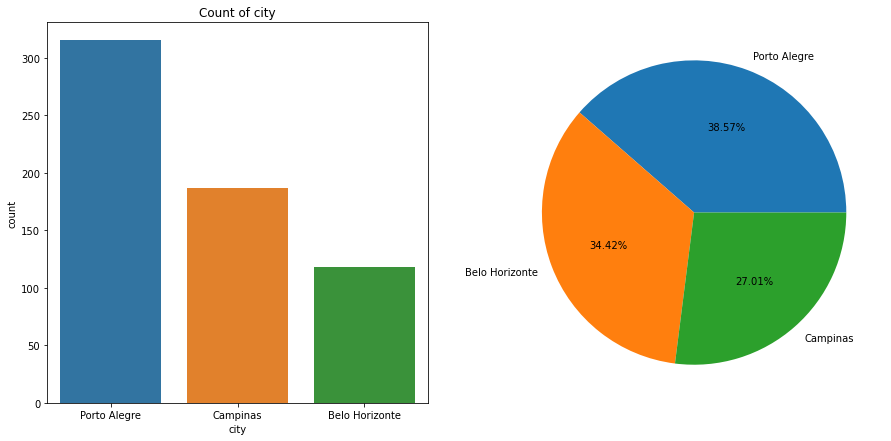

In [64]:
fix, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].set_title("Count of city")
percentage = mid_size_df["city"].value_counts()
labels = list(mid_size_df["city"].value_counts().index)

sns.countplot(x = bachelor_df["city"], ax=ax[0])
plt.pie(percentage,labels = labels, autopct = "%0.2f%%")

plt.show()

###### Interpretation: Porto Alegre covers approx. =~ 43.23% of the properties.

#### Level 2 Analysis

#### Q.) What is the price a mid size family has to pay?

In [65]:
minimum = mid_size_df['total (R$)'].min()
maximum = mid_size_df['total (R$)'].max()

print("The minimum cost is", minimum)
print("The maximum cost is", maximum)


The minimum cost is 550
The maximum cost is 23250


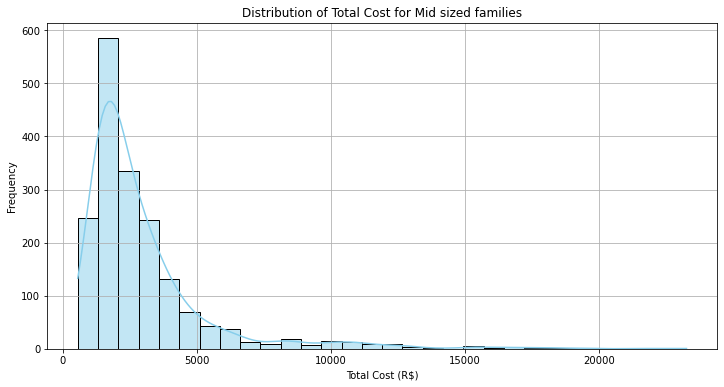

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(data=mid_size_df, x='total (R$)', kde =True, bins=30, color='skyblue')
plt.title('Distribution of Total Cost for Mid sized families')
plt.xlabel('Total Cost (R$)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

##### Interpretation: Each bar in the histogram represents a range of total costs, and the height of each bar represents the frequency. The minimum cost one has to pay is 550 dollars and the maximum cost is 23250 dollars.

#### Q.) What will be the average cost for mid-size families?

The average cost for mid-size families is:
                 rent amount (R$)    hoa (R$)  property tax (R$)  \
city                                                              
Belo Horizonte       2295.131833  401.268489         155.408360   
Campinas             2187.909836  594.956967         135.161885   
Porto Alegre         2369.760402  528.794835         131.532281   

                fire insurance (R$)  
city                                 
Belo Horizonte            32.987138  
Campinas                  29.563525  
Porto Alegre              36.232425  


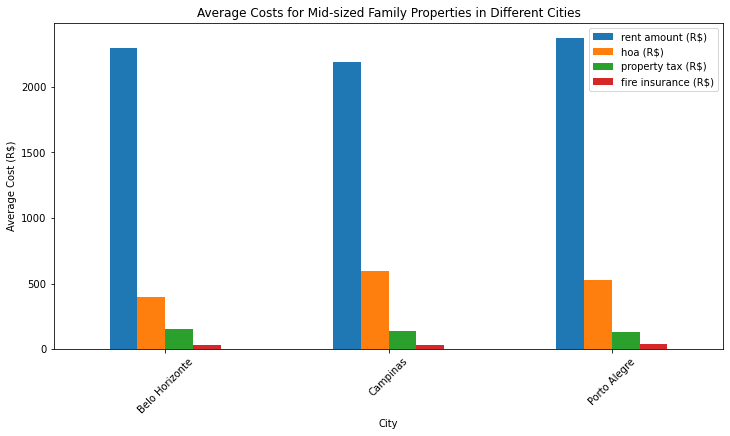

In [67]:
# Calculate the average costs for mid-sized family properties in each city
average_costs_for_mid_size = mid_size_df.groupby(['city'])[['rent amount (R$)', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']].mean()

print("The average cost for mid-size families is:\n",average_costs_for_mid_size)
# Plot a bar chart to visualize the average costs for mid-sized family properties in different cities
average_costs_for_mid_size.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Average Cost (R$)')
plt.title('Average Costs for Mid-sized Family Properties in Different Cities')
plt.xticks(rotation=45)
plt.show()

##### For mid-sized families Campinas is the most feasible place to live.

### For Large Sized Family

#### Level 0 Analysis

In [49]:
large_size_df = B_city[(B_city['rooms'] > 3) | (B_city['bathroom'] > 3) | (B_city['parking spaces'] > 2)]

In [50]:
large_size_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
28,Campinas,208,3,2,4,0,acept,not furnished,0,3180,100,48,3328
42,Belo Horizonte,200,4,2,1,7,not acept,not furnished,850,2550,9,34,3443
65,Campinas,300,4,4,3,2,acept,not furnished,2300,6000,417,77,8794
70,Belo Horizonte,220,4,2,3,3,acept,not furnished,450,2422,125,33,3030


In [51]:
large_size_df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10617,Belo Horizonte,169,3,2,4,0,acept,not furnished,0,3200,109,53,3362
10619,Belo Horizonte,360,1,1,8,0,acept,not furnished,0,2190,167,36,2393
10645,Porto Alegre,400,4,2,2,15,acept,furnished,2250,6300,500,92,9142
10659,Campinas,150,3,2,4,0,acept,furnished,0,3500,186,53,3739
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [52]:
large_size_df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

#### Level 1 Analysis

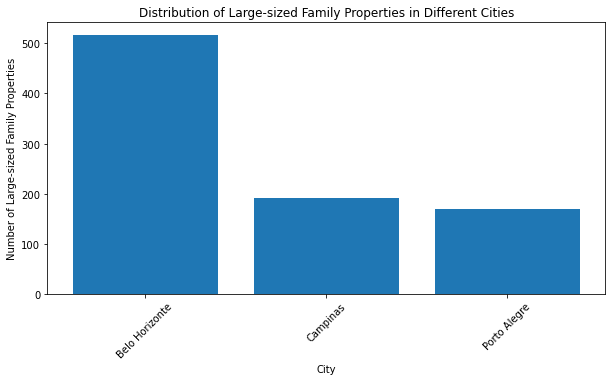

In [53]:
# Plot a bar chart to visualize the distribution of large-sized family properties 
city_counts = large_size_df['city'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Large-sized Family Properties')
plt.title('Distribution of Large-sized Family Properties in Different Cities')
plt.xticks(rotation=45)
plt.show()

##### Interpretation: For large size families, Belo Horizonte is the city with maximum number of properties. 

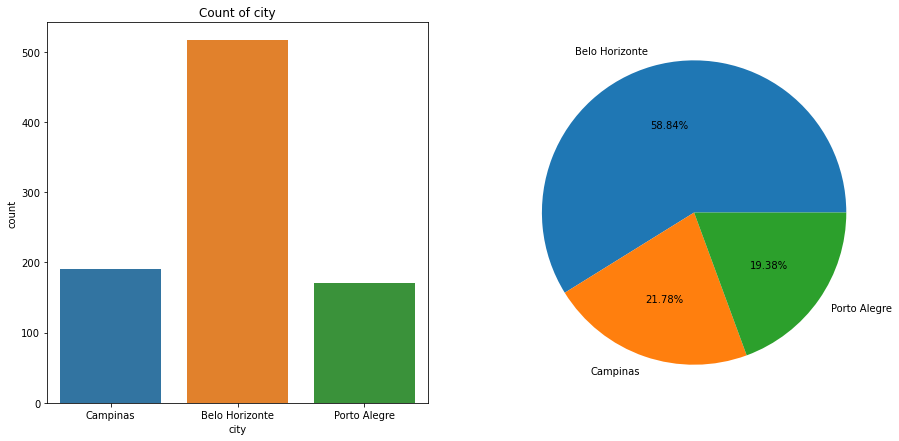

In [54]:
fix, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].set_title("Count of city")
percentage = large_size_df["city"].value_counts()
labels = list(large_size_df["city"].value_counts().index)

sns.countplot(x = large_size_df["city"], ax=ax[0])
plt.pie(percentage,labels = labels, autopct = "%0.2f%%")

plt.show()

##### Interpretation: Belo Horizonte city covers approximately =~ 58.84% of the properties.

#### Level 2 Analysis

#### Q.) How much total cost does large sized families have to pay?

In [55]:
mean = large_size_df['total (R$)'].mean()
maximum = large_size_df['total (R$)'].max()
print("The average cost is", mean)
print("The maximum cost is",maximum)

The average cost is 8674.683010262257
The maximum cost is 1120000


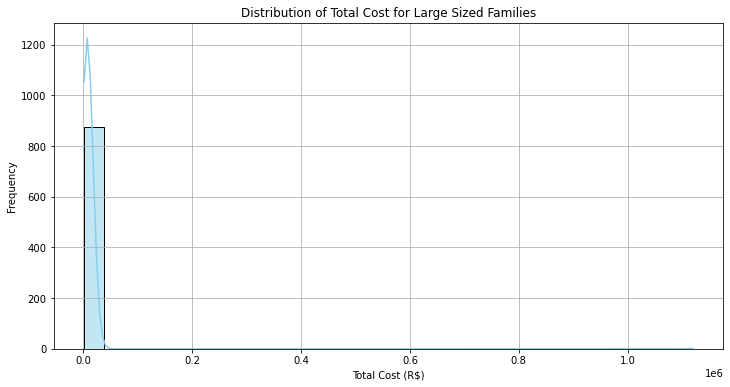

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(data=large_size_df, x='total (R$)', kde =True, bins=30, color='skyblue')
plt.title('Distribution of Total Cost for Large Sized Families')
plt.xlabel('Total Cost (R$)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()

#### For large sized families, the minimum cost one has to pay is 8891 dollars and maximum cost one can pay is 112000 dollars.

#### Q.) What is the average cost of living  for a large sized family in different cities?

The average cost of living for a large sized family in different cities is:
                 rent amount (R$)     hoa (R$)  property tax (R$)  \
city                                                               
Belo Horizonte       6362.242248  3000.777132         504.684109   
Campinas             5261.696335  1009.335079         388.413613   
Porto Alegre         5740.400000   714.164706         396.570588   

                fire insurance (R$)  
city                                 
Belo Horizonte            94.567829  
Campinas                  74.570681  
Porto Alegre              94.676471  


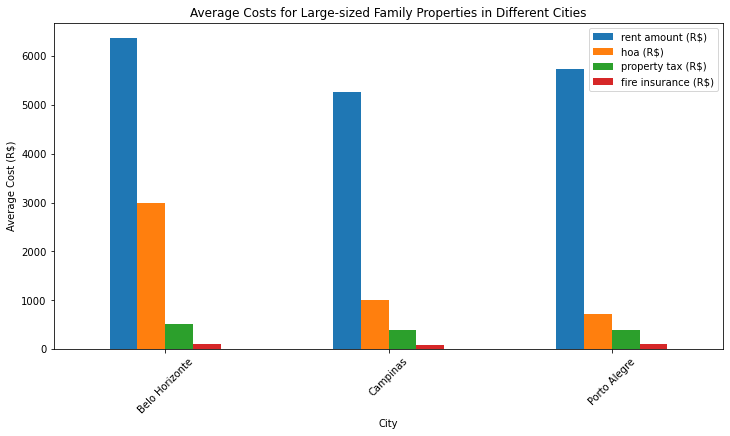

In [57]:
# Calculate the average costs for large-sized family properties in each city
average_costs_for_large_size = large_size_df.groupby(['city'])[['rent amount (R$)', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']].mean()

print("The average cost of living for a large sized family in different cities is:\n",average_costs_for_large_size )
# Plot a bar chart to visualize the average costs for large-sized family properties in different cities
average_costs_for_large_size.plot(kind='bar', figsize=(12, 6))
plt.xlabel('City')
plt.ylabel('Average Cost (R$)')
plt.title('Average Costs for Large-sized Family Properties in Different Cities')
plt.xticks(rotation=45)
plt.show()

##### Campinas is most feasible city to live among all the cities.

### Analysis conclusion:

##### Univariate, Bivariate and Multivariate Analysis

#### For Bachelors:
* 1 room, 1 bathroom, and 1 parking space.
* Feasible place to live Campinas. 
* Most costly place to live Belo Horizonte.
* Minimum cost one has to pay is 499 dollars and maximum one has to pay is 32750 dollars

#### For mid- sized families:
* 2 or 3 rooms, 2 or more than 2 bathrooms, and 2 or more than 2 parking spaces.
* The total cost is almost same in all 3 cities.
* Minimum rent 550 dollars and maximum is 23250 dollars

#### For large-sized families:
* more than 3 rooms, more than 3 bathrooms, more than 2 parking spaces.
* Feasible place to live Campinas.
* Minimum cost one has to pay is 8674.68 dollars and maximum cost is 112000 dollars.

#### Recommendations for Sao Paulo Residents:
* Sao Paulo residents looking for affordable housing options should consider exploring houses in Campinas.
* If Campinas doesn't offer sufficient options, their next choice could be Porto Alegre and Belo Horizonte.
* However, in Belo Horizonte, be prepared for higher rents

#### Recommendations for Rio De Janerio:
* Rio de Janeiro residents can find budget-friendly houses in Campinas.
* If Campinas lacks choices, their next preferable option would be Porto Alegre.

#### Recommendations for bachelors:
    * 1 bedroom (1bhk)
    * 1 bathroom
    * 1 parking space
    * Furnished or non-furnished
    * Animal Friendly or unfriendly

* Option 1: Campinas
* Option 2: Porto Alegre

#### Recommendations for mid size families:
    * 2 or 3 bedroom (2bhk or 3bhk)
    * 2 bathroom
    * 2 parking space
    * Furnished or non-furnished
    * Animal Friendly or unfriendly

* Option 1: Campinas
* Option 2: Porto Alegre

#### Recommendations for large size families:
    * more than 3 bedroom (3bhk or <3bhk)
    * more than 3 bathroom
    * more than 2 parking space
    * Furnished or non-furnished
    * Animal Friendly or unfriendly

* Option 1: Campinas
* Option 2: Belo Horizonte.